<a href="https://colab.research.google.com/github/SurajK7/ChestAI/blob/master/Baseline_U_Mixed_FP16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
%reload_ext autoreload
%autoreload 2

In [0]:
from fastai.vision import *
from torchvision.models import *
from utils import create_dfs, create_data, print_val_score, chexpert_targets, u_one_features, u_zero_features
from google.colab import drive
import pandas as pd
from pathlib import Path

In [0]:
drive.mount('/content/drive')

In [0]:
cp /content/drive/My\ Drive/CheXpert-v1.0-small.zip .

In [0]:
!unzip -qq CheXpert-v1.0-small.zip
!rm CheXpert-v1.0-small.zip

In [0]:
drive.flush_and_unmount()

In [0]:
full_train_df, full_valid_df = create_dfs()
full_df = pd.concat([full_train_df, full_valid_df])

In [0]:
# function to create class labels
def feature_string(row):
    feature_list = []
    for feature in u_one_features:
        if row[feature] in [-1,1]:
            feature_list.append(feature)
            
    for feature in u_zero_features:
        if row[feature] == 1:
            feature_list.append(feature)
            
    return ';'.join(feature_list)

In [0]:
#adding class labels
full_df['feature_string'] = full_df.apply(feature_string,axis = 1).fillna('')

In [0]:
data = create_data(full_df, size=320, bs=112)

In [0]:
learn = (cnn_learner(data, models.densenet121, pretrained=True)).to_fp16()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-02
Min loss divided by 10: 1.74E-02


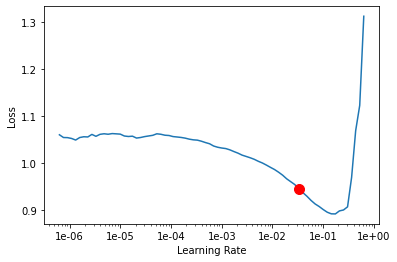

In [9]:
lr_find(learn)
learn.recorder.plot(suggestion=True)

In [0]:
lr = 3e-2

In [0]:
learn.fit_one_cycle(8, slice(lr), callbacks=[callbacks.SaveModelCallback(learn, every='epoch', name='mixed_model_1_freezed')])

In [12]:
print_val_score(learn, full_valid_df)

mixed_model_1_freezed_1


0.8796801028285053
mixed_model_1_freezed_4


0.8801266638353991
mixed_model_1_freezed_6


0.8848852203799902
mixed_model_1_freezed_5


0.8914149718057003
mixed_model_1_freezed_2


0.8648178554413976
mixed_model_1_freezed_3


0.8867493209040258
tmp


0.5600943430869256
mixed_model_1_freezed_0


0.8590056213519925
